## Section 6: Numerical Linear Algebra Operations Using Singular Value Decomp with NumPy and SciPy

In the previous section, we introduced numerical linear algebra routines in NumPy and SciPy.   We discussed basic linear algebra operations -- vector norms, determinants, vector & matrix multplications,  etc -- and how to solve systems of linear equations by writing the equations in the form $\textbf{Ax}$ = $\textbf{b}$ and inverting $\textbf{A}$ to solve for $\textbf{x}$.

Now, we will build upon this foundation by discussing NumPy/SciPy's implementations of singular value decomposition here.  In the next section, we will discuss eigenvector/eigenvalue decomposition and how these concepts are connected.

### Implementation of Singular Value Decomposition (SVD) in Python

Singular value decomposition is another ultra-powerful linear algebra operation.   For my research, it becomes especially powerful in cases where the data are noisy, such that a full matrix inversion tends to amplify noise (which, you know, is bad).   Because we live in the real world, _all_ data are noisy to some level, sometimes at a level that matters. Hence SVD.

SVD decomposes a matrix of $m$ rows and $n$ columns into the product of three matrices: the left singular matrix $U$, a diagonal matrix containing the singular values $\Sigma$, and a right singular matrix $V^{T}$ ("the transpose of V"):

$\textbf{A}$ = $\textbf{U}$ ${\Sigma}$ $\textbf{V}$$^{T}$

Note that the dimensions of each of these matrices is different: the left singular matrix $U$ has dimensions of $mxm$ (i.e. a square matrix equal to the number of rows), the diagonal matrix containing singular values $\Sigma$ have $mxn$ dimensions, and the right singular matrix $V^{T}$  has $nxn$ dimensions.   Note that, being a diagonal matrix, $\Sigma$ = 0 for off-diagonal terms (i.e. $\Sigma_{ij}$ = 0 for i $\ne$ j); along the diagonal, $\Sigma$ has entries $\sigma$, where $\sigma_{i}$ $\ge$ 0 and $\sigma_{1}$ $\ge$ $\sigma_{2}$ and so on.

The columns $m$ of $U$ and columns $n$ of $V$ are "left singular vectors" and "right singular vectors", respectively.

In Numpy, the function to do SVD is ``np.linalg.svd``, which returns a 3-element tuple of NumPy arrays.  E.g. 

In [1]:
import numpy as np

In [2]:
aaa=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]])

aaa.shape
#(5,4)
aaa

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [3]:
U,s,Vt=np.linalg.svd(aaa)

In [4]:
len(s)

4

In [5]:
print(s.shape)
s

(4,)


array([5.35202225e+01, 2.36342639e+00, 2.80168688e-15, 3.27120515e-16])

In [6]:
S=np.zeros(np.shape(aaa)) ##THIS IS IMPORTANT!

print(S.shape)
S

(5, 4)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
np.fill_diagonal(S,s)

S

array([[5.35202225e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.36342639e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.80168688e-15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.27120515e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [8]:
#note, another way of doing this is ...

S=np.zeros((aaa.shape[0],aaa.shape[1]))
S[:aaa.shape[1],:aaa.shape[1]]=np.diag(s)

In [9]:
#Array values
aaa

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [10]:
#U
print('U is \n',U)
       
#S
print('S is \n',S)
       
#Vt
print('Vt is \n',Vt)

U is 
 [[-0.09654784 -0.76855612  0.63114024  0.02921332  0.02843553]
 [-0.24551564 -0.4896142  -0.60188109 -0.56760967 -0.12473335]
 [-0.39448345 -0.21067228 -0.36930947  0.63064774  0.51564906]
 [-0.54345125  0.06826963  0.01970126  0.32468027 -0.77084018]
 [-0.69241905  0.34721155  0.32034906 -0.41693165  0.35148894]]
S is 
 [[5.35202225e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.36342639e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.80168688e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.27120515e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
Vt is 
 [[-0.44301884 -0.47987252 -0.51672621 -0.55357989]
 [ 0.70974242  0.26404992 -0.18164258 -0.62733508]
 [ 0.40990689 -0.81731953  0.40491839  0.00249425]
 [-0.36328548  0.17885409  0.73214827 -0.54771688]]


In [11]:
#dimensionality

U.shape
#(5,5)

(5, 5)

In [12]:
S.shape
#(5,4)

(5, 4)

In [13]:
Vt.shape
#(4,4)


(4, 4)

In [14]:
reconstructed_mat=np.dot(U,S).dot(Vt) #multiply each of these matrices together
print(reconstructed_mat)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]
 [17. 18. 19. 20.]]


In [15]:
#confirm that this is equal to the original matrix aaa within machine precision
residual=aaa-reconstructed_mat

residual

array([[0.00000000e+00, 8.88178420e-15, 8.43769499e-15, 1.46549439e-14],
       [0.00000000e+00, 0.00000000e+00, 8.88178420e-16, 3.55271368e-15],
       [0.00000000e+00, 3.55271368e-15, 1.77635684e-15, 7.10542736e-15],
       [0.00000000e+00, 3.55271368e-15, 3.55271368e-15, 1.06581410e-14],
       [3.55271368e-15, 7.10542736e-15, 7.10542736e-15, 1.42108547e-14]])

In the above example, note the cautions about the singular value matrix, $s$.  What np.linalg.svd actually returns for $s$ is a 1-D vector of singular values (my guess is that this is for speed/memory issues). 

So, caution: $\Sigma$ is a diagonal matrix with these values, but the matrix itself is 2-D (the off-diagonal elements are zero).  To get the full middle matrix you have to create another array equal in dimensionality to the original matrix, set all elements originally to zero, and then fill the diagonals with $s$.  

Before proceeding, there are a few other useful things to note.  

First,  1) the matrices $U$ and $V$ are _orthogonal_ matrices, so the column vectors making up $U$ and $V$ comprise an orthonormal (perpendicular) set of vectors, so they have a norm of 1.  

 We can confirm that the norm of each column vector is 1
 

In [16]:
np.linalg.norm(U[:,0])

0.9999999999999998

In [19]:
print(np.linalg.norm(U[:,2]) )# also 1

print(np.linalg.norm(U[:,3])) #still 1

0.9999999999999999
0.9999999999999999


Second, 2) for orthogonal matrices like $U$ and $V$, $UU^{T}$ = $U^{T}U$ = $I$ and $VV^{T}$ = $V^{T}V$  = $I$.   

We can see this is the case as follows:
e.g.

$U^{T}$ $x$ $U$ = ($u_{1}$ ... $u_{n}$ )$^{T}$($u_{1}$ ... $u_{n}$ )

$U^{T}$ $x$ $U$ = $\left(\begin{array}{@{}c@{}}
u_{1}\\
... \\
u_{n}
 \end{array} \right)$
 ($u_{1}$ ... $u_{n}$ ), which yields
 
 $\left( {\begin{array}{cc}
  u_{1}.u_{1}  & ...  & u_{1}.u_{n}\\
   ... & ...   & ...\\
   u_{n}.u_{1} & ... & u_{n}.u_{n} 
  \end{array} } \right)$ 
  
  Since the vectors making up $U$ are pairwise perpendicular (i.e. orthogonal), then 
  
  $u_{i}.u_{j}$ = 1 if $i$ = $j$
  
  else
  
  $u_{i}.u_{j}$ = 0 if $i$ $\ne$ $j$
  
  

  We can confirm this using NumPy's dot product calculation
  

In [20]:
np.dot(U,U.T)



array([[ 1.00000000e+00,  4.96258086e-17, -1.44255606e-16,
        -2.57194493e-16, -3.86194699e-16],
       [ 4.96258086e-17,  1.00000000e+00,  1.04707288e-16,
         1.68668157e-17, -1.93836627e-16],
       [-1.44255606e-16,  1.04707288e-16,  1.00000000e+00,
        -1.79391599e-16, -8.91621821e-17],
       [-2.57194493e-16,  1.68668157e-17, -1.79391599e-16,
         1.00000000e+00, -1.21868168e-16],
       [-3.86194699e-16, -1.93836627e-16, -8.91621821e-17,
        -1.21868168e-16,  1.00000000e+00]])

Third, 3) a further consequence of this property is that the inverse of $U$ or $V$ is equal to its transpose.   E.g. $U^{T}$ = $U^{-1}$.   

We can see this as follows:

In [21]:
print(np.linalg.inv(U))

[[-0.09654784 -0.24551564 -0.39448345 -0.54345125 -0.69241905]
 [-0.76855612 -0.4896142  -0.21067228  0.06826963  0.34721155]
 [ 0.63114024 -0.60188109 -0.36930947  0.01970126  0.32034906]
 [ 0.02921332 -0.56760967  0.63064774  0.32468027 -0.41693165]
 [ 0.02843553 -0.12473335  0.51564906 -0.77084018  0.35148894]]


In [22]:
       
print('')      
print(U.T)
print('')
 


[[-0.09654784 -0.24551564 -0.39448345 -0.54345125 -0.69241905]
 [-0.76855612 -0.4896142  -0.21067228  0.06826963  0.34721155]
 [ 0.63114024 -0.60188109 -0.36930947  0.01970126  0.32034906]
 [ 0.02921332 -0.56760967  0.63064774  0.32468027 -0.41693165]
 [ 0.02843553 -0.12473335  0.51564906 -0.77084018  0.35148894]]



In [23]:
             
uut=np.dot(U,U.T)
print(uut)

[[ 1.00000000e+00  4.96258086e-17 -1.44255606e-16 -2.57194493e-16
  -3.86194699e-16]
 [ 4.96258086e-17  1.00000000e+00  1.04707288e-16  1.68668157e-17
  -1.93836627e-16]
 [-1.44255606e-16  1.04707288e-16  1.00000000e+00 -1.79391599e-16
  -8.91621821e-17]
 [-2.57194493e-16  1.68668157e-17 -1.79391599e-16  1.00000000e+00
  -1.21868168e-16]
 [-3.86194699e-16 -1.93836627e-16 -8.91621821e-17 -1.21868168e-16
   1.00000000e+00]]


These points will end up being useful when we try to (pseudo-)invert matrices using SVD (see below).

### (Pseudo-)Inverting Matrices Using SVD

SVD has particular power when it comes to matrix inversions.  First, let's try to directly invert the matrix ``aaa`` and see what happens:

In [24]:
aaa.shape
#(5,4)


(5, 4)

In [25]:
np.linalg.inv(aaa)

LinAlgError: Last 2 dimensions of the array must be square

We get a Traceback error because (not surprisingly) the matrix ``aaa`` is not a square matrix.   SVD allows us to work around that.  

The SVD of a matrix leaves:

$\textbf{A}$ = $\textbf{U}$ ${\Sigma}$ $\textbf{V}$$^{T}$

What if we try to do the inversion in "SVD space"?  I.e.

($\textbf{U}$ ${\Sigma}$ $\textbf{V}$$^{T}$)$^{-1}$

Well, first remember matrix rules.   Specifically ...

($\textbf{U}$ ${\Sigma}$ $\textbf{V}$$^{T}$)$^{-1}$ --> ($\textbf{V}$$^{T}$)$^{-1}$${\Sigma}$$^{-1}$$\textbf{U}^{-1}$ 

second, from item 3) above, that the inverse and transpose of an orthogonal matrix is the same thing and both $U$ and $V$ are orthogonal matrices.   So ($\textbf{V}$$^{T}$)$^{-1}$ --> $\textbf{V}$.  Thus, $\textbf{V}$${\Sigma}$$^{-1}$$\textbf{U}^{-1}$ .

Hence,

the "inverse", or more accurately the Moore-Penrose _pseudoinverse_ (yes, _that_ Penrose), of the SVD'd version of $\textbf{A}$ is 

$A^{\dagger}$ = $\textbf{V}$$\Sigma^{-1}$$\textbf{U}^{T}$.

The function to compute the pseudoinverse in NumPy is ``np.linalg.pinv``.  For SciPy, it is ``scipy.linalg.pinv``.  

Now, hold on ... we started this section talking about how we cannot directly invert a non-square matrix.  Yet we are still effectively tasked with that because $\Sigma$ has dimensions $m$x$n$, while $U$ is $m$x$m$ and $V^{T}$ is $n$x$n$.   If $m$ isn't the same as $n$ we don't have a square matrix.  So not invertible, right?   

Not exactly ... again, we are dealing with a _pseudo-inversion_ but the consequence is very much what we want. 

The easiest way to figure out how Python works around this the square matrix problem by looking at the ``np.linalg.pinv`` source code itself (annotated a bit by me)

```
def pinv(a, rcond=1e-15, hermitian=False):
    a, wrap = _makearray(a)
    rcond = np.asarray(rcond)
    if _is_empty_2d(a):
        m, n = a.shape[-2:]
        res = np.empty(a.shape[:-2] + (n, m), dtype=a.dtype)
        return wrap(res)
    a = a.conjugate()
    u, s, vt = svd(a, full_matrices=False)

    # discard small singular values
    cutoff = rcond[..., np.newaxis] * np.amax(s, axis=-1, keepdims=True)
    large = s > cutoff
    s = np.divide(1, s, where=large, out=s)
    s[~large] = 0

    res = np.matmul(np.transpose(vt), np.multiply(s[..., np.newaxis], np.transpose(u)))
    return wrap(res)
    
    
def _makearray(a):
    new = np.asarray(a)
    wrap = getattr(a, "__array_prepare__", new.__array_wrap__)
    return new, wrap

```

Basically, here is what we do ... we compute the SVD of the original matrix, do some Python trickery to turn single numbers into arrays, take 1 over each value for $\Sigma$ (which is what the inverse actually does) and then  _truncate_ the matrix $\Sigma$: setting all values to 0 that are below our _rcond_ number _relative to the largest singular value.  

The ``res`` part is the trickiest, arguably, and it is easiest to go right to left.  First, we do ``s[...,np.newaxis]``.  The ellipsis means something like "for all dimensions except ___".   E.g. in a 2x2x2x2 matrix called "largematrix", ``largematrix[...,0]`` will retain all first row elements in the 4th dimension.   It really doesn't do much here in practical terms, though, as the syntax is equivalent to ``s = s[:,np.newaxis]``, which gives us a (4,1) array:

In [26]:

s_version2=s[...,np.newaxis]
s_version2.shape
#(4,1)
#s.shape

(4, 1)

Then we multiply this vector by the transpose of u (which has shape (4,5)), yielding a matrix with dimensions (4,5).   

```right_matrix=np.multiply(s[...,np.newaxis],np.transpose(u))```

Then multiply the transpose of $V^{T}$ (which is just $V$) by this (4,5) matrix.   

```
pseudo_inv=np.matmul(np.transpose(vt),right_matrix)
pseudo_inv.shape
#(4,5)
```

This yields a (4,5) matrix.  As our original matrix is (5,4), dimensionally this works out as a matrix that has been (pseudo-)inverted.

The full code comparing the canned pseudo-inverse from NumPy with our "manual" version is ``def ex1`` in the script ``svd_pinv_demo.py`` (remember, to run do ``from svd_pinv_demo import ex1; ex1()``).

We repeat it here for completeness:

In [27]:
def ex1():


 aaa=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]])


#with np.linalg.svd

 aaa_inv=np.linalg.pinv(aaa)

 print("the NumPy-produced inverted matrix is \n")
 print(aaa_inv)

 
#manual version

 new = np.asarray(aaa) #not really needed but we are following the NumPy syntax

# wrap = getattr(aaa, "__array_prepare__", new.__array_wrap__) ### def not needed to demonstrate the point

 rcond=1e-15 #default value for pseudo-inverse
 rcond=np.asarray(rcond)
 print('new is ',new)
 #new = new.conjugate() #this is useful if you have complex numbers, otherwise not needed here)

#taking the SVD
 u,s,vt=np.linalg.svd(new,full_matrices=False)

 #print(u.shape,s.shape,vt.shape)
 cutoff = rcond[..., np.newaxis] * np.amax(s, axis=-1, keepdims=True)

 large = s > cutoff
 s = np.divide(1, s, where=large, out=s)
 s[~large] = 0

 s_version2=s[...,np.newaxis]

 right_matrix=np.multiply(s_version2,np.transpose(u))

 aaa_inv2=np.matmul(vt.T,right_matrix)

 print("the manually-produced inverted matrix is \n")
 print('aaa_inv2 is ',aaa_inv2)
 print('')
 print("the residuals are ...")
 print(aaa_inv2-aaa_inv)
 



ex1()

the NumPy-produced inverted matrix is 

[[-2.30000000e-01 -1.45000000e-01 -6.00000000e-02  2.50000000e-02
   1.10000000e-01]
 [-8.50000000e-02 -5.25000000e-02 -2.00000000e-02  1.25000000e-02
   4.50000000e-02]
 [ 6.00000000e-02  4.00000000e-02  2.00000000e-02 -2.48040464e-17
  -2.00000000e-02]
 [ 2.05000000e-01  1.32500000e-01  6.00000000e-02 -1.25000000e-02
  -8.50000000e-02]]
new is  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
the manually-produced inverted matrix is 

aaa_inv2 is  [[-2.30000000e-01 -1.45000000e-01 -6.00000000e-02  2.50000000e-02
   1.10000000e-01]
 [-8.50000000e-02 -5.25000000e-02 -2.00000000e-02  1.25000000e-02
   4.50000000e-02]
 [ 6.00000000e-02  4.00000000e-02  2.00000000e-02 -2.48040464e-17
  -2.00000000e-02]
 [ 2.05000000e-01  1.32500000e-01  6.00000000e-02 -1.25000000e-02
  -8.50000000e-02]]

the residuals are ...
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Truncated SVD in Python; Matrix Condition Number and Matrix Rank/Null Space

 To do a head-to-head comparison with a direct inverse, let's make a 4 by 4 matrix and compare a direct inversion with an SVD.  This is described in ``def ex2():``, and we repeat the most important lines here.
 

In [28]:
aaa=np.array([[1.1,2.2,3.3,4.4],[5.5,6.6,7.7,8.7],[9.98,10.1,11.11,12.12],[13,14,15,16],[17,18,19,20]])
aaa=aaa[:4,:] #making a 4x4 matrix

print(aaa)
#[[ 1.1   2.2   3.3   4.4 ]
# [ 5.5   6.6   7.7   8.7 ]
# [ 9.98 10.1  11.11 12.12]
# [13.   14.   15.   16.  ]]
 

[[ 1.1   2.2   3.3   4.4 ]
 [ 5.5   6.6   7.7   8.7 ]
 [ 9.98 10.1  11.11 12.12]
 [13.   14.   15.   16.  ]]


In [29]:
def ex2(rcond=1e-15):

#newer array
 aaa=np.array([[1.1,2.2,3.3,4.4],[5.5,6.6,7.7,8.7],[9.98,10.1,11.11,12.12],[13,14,15,16],[17,18,19,20]])

#original array
 #aaa=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]])

 aaa=aaa[:4,:] #chopping off last row, making a 4x4 matrix

#a straight inverse

 aaa_invreg=np.linalg.inv(aaa)

#with np.linalg.svd

 aaa_inv=np.linalg.pinv(aaa)

#manually

 new = np.asarray(aaa)
# wrap = getattr(aaa, "__array_prepare__", new.__array_wrap__)

#rcond is now pushed to a keyword

 rcond=np.asarray(rcond)
 new = new.conjugate()

#taking the SVD
 u,s,vt=np.linalg.svd(new,full_matrices=False)

 cutoff = rcond[..., np.newaxis] * np.amax(s, axis=-1, keepdims=True)

 #print('cutoff is',cutoff)
 #print('s is ',s)
 #print(rcond*s,rcond*np.amax(s,axis=-1,keepdims=True))

 large = s > cutoff
 s = np.divide(1, s, where=large, out=s)
 s[~large] = 0

 s_version2=s[...,np.newaxis]

 right_matrix=np.multiply(s_version2,np.transpose(u))

 aaa_inv2=np.matmul(vt.T,right_matrix)

 print("the straightforward inverse yields")
 print(aaa_invreg)
 print('')
 print("the NumPy pseudo-inverse yields")
 print(aaa_inv)
 print('')
 print("the manual pseudo-inverse yields")
 print(aaa_inv2)
 print('')
 print("the difference between the straightforward inverse and NumPy pseudo-inverse are")
 print(np.max(aaa_invreg-aaa_inv))

 #print("difference bt manual and NumPy ",aaa_inv-aaa_inv2)

ex2()

the straightforward inverse yields
[[-3.43888321e-01 -2.18628534e-15  1.12359551e+00 -7.56554307e-01]
 [ 6.21807967e+00 -1.00000000e+01 -2.24719101e+00  5.42977528e+00]
 [-1.26166156e+01  2.00000000e+01  1.12359551e+00 -8.25655431e+00]
 [ 6.66666667e+00 -1.00000000e+01  2.03556881e-14  3.66666667e+00]]

the NumPy pseudo-inverse yields
[[-3.43888321e-01 -2.57494943e-14  1.12359551e+00 -7.56554307e-01]
 [ 6.21807967e+00 -1.00000000e+01 -2.24719101e+00  5.42977528e+00]
 [-1.26166156e+01  2.00000000e+01  1.12359551e+00 -8.25655431e+00]
 [ 6.66666667e+00 -1.00000000e+01 -1.90050231e-14  3.66666667e+00]]

the manual pseudo-inverse yields
[[-3.43888321e-01 -2.57494943e-14  1.12359551e+00 -7.56554307e-01]
 [ 6.21807967e+00 -1.00000000e+01 -2.24719101e+00  5.42977528e+00]
 [-1.26166156e+01  2.00000000e+01  1.12359551e+00 -8.25655431e+00]
 [ 6.66666667e+00 -1.00000000e+01 -1.90050231e-14  3.66666667e+00]]

the difference between the straightforward inverse and NumPy pseudo-inverse are
3.89022147

Then compute the difference between NumPy's regular inverse, its pseudo-inverse, and a manual pseudo-inverse.

This is tiny, comparable to the machine precision.

But now let's do a slightly different matrix: a 91x91 element matrix of random numbers.  ``aaa=np.random.rand(91,91)``.  The matrix (and thus the inverse) will be different each time, but let's report the minimum and maximum singular value from the $\Sigma$ diagonal matrix.  This is contained in the ``ex3`` function code

[4.56862565e-14 5.66160412e-15 5.23128549e-15 5.06574402e-15
 4.90586089e-15 4.86841315e-15 4.73007824e-15 4.61224808e-15
 4.58307609e-15 4.54588022e-15 4.45160426e-15 4.38481367e-15
 4.22556677e-15 4.13469304e-15 4.10366802e-15 4.04139567e-15
 3.97366531e-15 3.90615485e-15 3.78101601e-15 3.76818813e-15
 3.67709867e-15 3.63400260e-15 3.58101535e-15 3.53915735e-15
 3.44842682e-15 3.41904907e-15 3.38400689e-15 3.29564928e-15
 3.22916872e-15 3.19787370e-15 3.19270538e-15 3.04227006e-15
 3.02350593e-15 2.94800645e-15 2.85353781e-15 2.76396150e-15
 2.73320929e-15 2.72077763e-15 2.65525441e-15 2.60489221e-15
 2.48865143e-15 2.42978699e-15 2.38722291e-15 2.33604161e-15
 2.24724476e-15 2.22390807e-15 2.16468811e-15 2.11611398e-15
 2.08735772e-15 1.99752255e-15 1.96229399e-15 1.90632980e-15
 1.84844728e-15 1.80366114e-15 1.74480385e-15 1.72112438e-15
 1.68269754e-15 1.63428584e-15 1.57839571e-15 1.52839982e-15
 1.50457202e-15 1.44159602e-15 1.42180035e-15 1.35395204e-15
 1.28353836e-15 1.190779

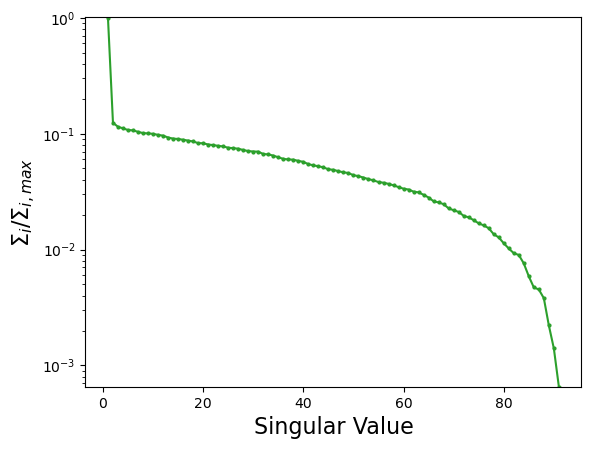

truncated s is [4.56862565e+01 5.66160412e+00 5.23128549e+00 5.06574402e+00
 4.90586089e+00 4.86841315e+00 4.73007824e+00 4.61224808e+00
 4.58307609e+00 4.54588022e+00 4.45160426e+00 4.38481367e+00
 4.22556677e+00 4.13469304e+00 4.10366802e+00 4.04139567e+00
 3.97366531e+00 3.90615485e+00 3.78101601e+00 3.76818813e+00
 3.67709867e+00 3.63400260e+00 3.58101535e+00 3.53915735e+00
 3.44842682e+00 3.41904907e+00 3.38400689e+00 3.29564928e+00
 3.22916872e+00 3.19787370e+00 3.19270538e+00 3.04227006e+00
 3.02350593e+00 2.94800645e+00 2.85353781e+00 2.76396150e+00
 2.73320929e+00 2.72077763e+00 2.65525441e+00 2.60489221e+00
 2.48865143e+00 2.42978699e+00 2.38722291e+00 2.33604161e+00
 2.24724476e+00 2.22390807e+00 2.16468811e+00 2.11611398e+00
 2.08735772e+00 1.99752255e+00 1.96229399e+00 1.90632980e+00
 1.84844728e+00 1.80366114e+00 1.74480385e+00 1.72112438e+00
 1.68269754e+00 1.63428584e+00 1.57839571e+00 1.52839982e+00
 1.50457202e+00 1.44159602e+00 1.42180035e+00 1.35395204e+00
 1.283538

In [31]:
from code_ipynb.svd_pinv_demo import ex3

ex3()




And now we can plot the _relative_ value of the singular values (basically, dividing each $s$ by the maximum $s$).
![](./figures/Figure_4demo.png)



If we repeat this matrix generation a bunch of times we will get qualitatively similar answers.   The point: we see one very large singular value, a bunch (60 or so?) about 0.02-0.1 times as large, and then a rapid tail at very small singular values.  

A useful (for now, at least: see later) interpretation is that the first singular value is the dominant one in explaining the variance in the data, while very low-value singular values explain little of the variance and can be discarded without much loss of accuracy***.  

***(An analogy, start with an ellipse with coordinates x and y and then transform to 3 dimensions (i.e. add a z direction).  If the magnitude along the z direction is tiny compared to x and y, then this spheroid is essentially a 2-D ellipse).    

Another thing becomes important when we try to _invert_ matrices.  Matrices with singular values of 0 are bad news (can't invert them).  You can determine if a matrix is a singular matrix if the determinant of the matrix is 0. those with values _close_ to 0 are also dangerous because it may not be possible to accurately compute them.   In these cases, matrices are _ill-conditioned_ because dividing by the singular values  1/$s_{i}$ -- i.e. what you do when you invert $\Sigma$ ($\Sigma^{-1}$) -- for $s_{i}$ that are really close to zero will result in numerical errors.   

The degree to which ill-conditioning prevents a matrix from being inverted accurately depends on
the ratio of its largest to smallest singular value, a quantity known as the **condition number**:

$c.n.$ = $s_{i}$/$s_{n}$.   

In the example above, the condition number of $\Sigma$ is nothing to be worried about from a numerical error standpoint (about 10$^{-4}$).   But remember all those 10$^{-15}$ numbers we saw when comparing the direct inverse to the pseudo-inverse?   That's a sign that we are getting close to machine precision (which is $\sim$10$^{-15}$--10$^{-16}$ for floating-point operations in Python).   In other words, if the condition number for your matrix is near the machine precision, then that's a sign you are risking propagating errors in your matrix inversions.  Then _truncating_ the $\Sigma$ matrix at some threshold helps guard against numerical errors. 

Another context where this useful is when your matrix is "noisy" (e.g. working with images).  In such a case, a full matrix inversion will end up amplifying this noise.   Truncated SVD therefore guards against this problem.  

The _rank_ of a matrix is equal to: (i) its number of linearly independent columns; (ii)
its number of linearly independent rows (these end up being the same thing).  You can think of the matrix rank as the dimensionality of the vector space spanned by its rows or its columns. 

SVD gives you a particularly straightforward to identify the rank of the matrix: the rank is equal to the number of non-zero singular values of a matrix.   We can identify the matrix rank in NumPy from ``np.linalg.matrix_rank([name of matrix])``.   The main keyword here is ``tol`` (e.g. for a matrix M, np.linalg.matrix_rank(M,tol=1e-15) gives its rank).   Otherwise, what this does is that it calculates the rank of the matrix from the number of _non-zero_ singular values.   Conversely, the singular values equal to zero refer to the _null space_ of the matrix.   

For example, let's go back to the matrix aaa:

In [32]:
aaa=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]])
aaa.shape

rank=np.linalg.matrix_rank(aaa)

In [33]:
 

print(rank)
#2



2


In [34]:
aaa=aaa[:4,:]

aaa
np.linalg.matrix_rank(aaa)

2

We get the same answer if we chop off one of the rows of aaa (i.e. aaa=aaa[:4,:]).   We can confirm by returning the matrix $\Sigma$

In [35]:

U,s,Vt=np.linalg.svd(aaa)
S=np.zeros(np.shape(aaa))
np.fill_diagonal(S,s)

S



array([[3.86226568e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.07132307e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.69766687e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.52519360e-17]])

There, there are two singular values that are about 1 or greater and then two that are $\sim$0 within machine precision.  Hence, the rank of the matrix is 2. 




So even though the matrix has 5 rows and 4 columns, its rank is two.  

Now, try the same with the "edited" version of aaa which we used in this section to demonstrate truncated SVD

In [36]:
aaa=np.array([[1.1,2.2,3.3,4.4],[5.5,6.6,7.7,8.7],[9.98,10.1,11.11,12.12],[13,14,15,16]])

In [37]:
print(np.linalg.matrix_rank(aaa))
#4

4


In [38]:
#a check
U,s,Vt=np.linalg.svd(aaa)
S=np.zeros(np.shape(aaa))
np.fill_diagonal(S,s)

print(S)

[[3.94670012e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.28462303e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.02701645e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.23542887e-02]]


The dimensions of this matrix about the same as the previous one but here we have four diagonal elements that are very much larger than $\sim$10$^{-14}$--10$^{-16}$.   Hence, the rank of this matrix is 4.

So then what happens to the matrix rank when we truncate $\Sigma$?   It is _reduced_.   E.g. if we truncate the previous matrix aaa (i.e. the one we just determined is a rank-4 matrix) at tol=0.05, then the rank is reduced to 3

In [39]:

np.linalg.matrix_rank(aaa,tol=0.05)
#3


3

This helps us interpret exactly what we are doing when we use truncated SVD for matrix inversions.   I.e. truncating $\Sigma$ produces a _reduced-rank_ (or "lower-rank") approximation to the full matrix $A$.  Since we can think of each one of the column vectors $U$ or $V^{T}$ (which have corresponding singular values) as dimensions, truncated SVD can be thought of as "dimensionality reduction".

---

tl;dr ... 

So, we can perform _truncated_ singular value decomposition by setting to zero all of the singular values below some threshold.  In ``np.linalg.pinv`` this threshold is ``rcond``.  The number is normalized _relative_ to the largest singular value.   E.g. so if the largest singular value is 6 and you set ``rcond=0.01``, then all singular values (i.e. all diagonal elements of $\Sigma$) less than 0.06 will bet set to zero.  The rank of the matrix returns the number of non-zero singular values; the null space corresponds to singular values = 0.   Truncated SVD produces a lower-rank approximation to the original matrix $A$ and can be thought of as a dimensionality reduction.

#### Practical Examples of SVD for Scientific Python


#### _Exoplanet Direct Imaging (Modifying LOCI)_ 

Recall the LOCI equation from the previous section, which is basically a least-squares solution to a system of linear equations.   In direct imaging instead of directly solving  **A****x**=**b**, we can decompose the **A** matrix as $\textbf{U}$ ${\Sigma}$ $\textbf{V}$$^{T}$.   

Then to invert **A** (i.e. **A**$^{-1}$) we compute $\textbf{V}$${\Sigma_{t}}^{-1}$$\textbf{U}^{T}$, where the subscript $t$ stands for _truncate_.  I.e. we truncate $\Sigma$ below some threshold (relative) singular value.  There are multiple reasons why this may be useful, including guarding against the impact of detector noise, circumstellar disk emission (long story: basically, it causes lst-sq algorithms to converge to weird results).


#### _Image Compression and Pattern Matching_ 

Related practical applications of SVD deals with the broad topics of image compression and feature matching.  Note that this is very similar thing to the exoplanet topic but in a different research focus (least-squares solutions with imaging like LOCI depend on matching patterns -- i.e. speckles -- across an image set).

When we want to compress a file, we’re always looking for the most efficient approach with the lowest amount of unnecessary data. The smaller the image, the less the cost of storage and transmission. The SVD Algorithm will help us by decomposing a given matrix (an image is a matrix with different values representing colors) into three matrices to finally represent the image with a smaller set of values.

That way, image compression will be achieved while preserving the important features that make the original picture.

Here's an example of a picture of a celebration of one of my best friends.  Look what happens to the image as we go from retaining only the largest singular value, to the first 5, and so on.

The source code is contained in ``svd_image.py`` and we repeat the key aspects below...

In [46]:
from code_ipynb.svd_image import truncate_image

In [47]:
#truncate_image(k=5,pathtoimage='./code_ipynb/') #k is the number of diagonal elements retained

Let's do some examples ...

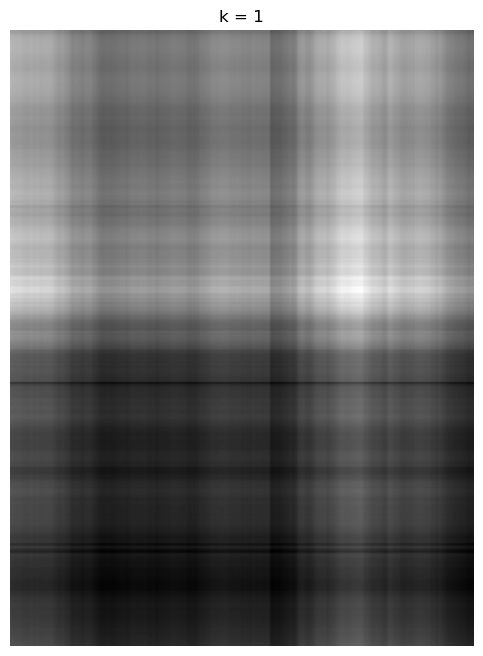

In [48]:
#First singular value retained, only:
truncate_image(k=1,pathtoimage='./code_ipynb/')

Hard to see what this is but we do know there are regions of the image that are bright and regions that are dark.

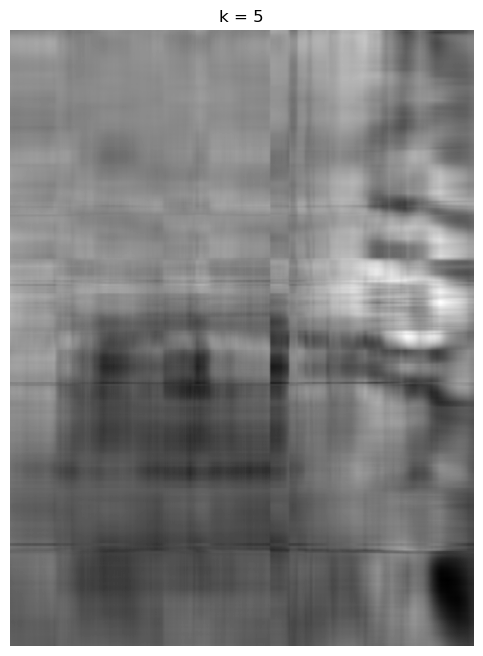

In [49]:
#First 5:
truncate_image(k=5,pathtoimage='./code_ipynb/')


Still unclear but we are starting to see the shape of something.  There is more structure to the light and dark regions.

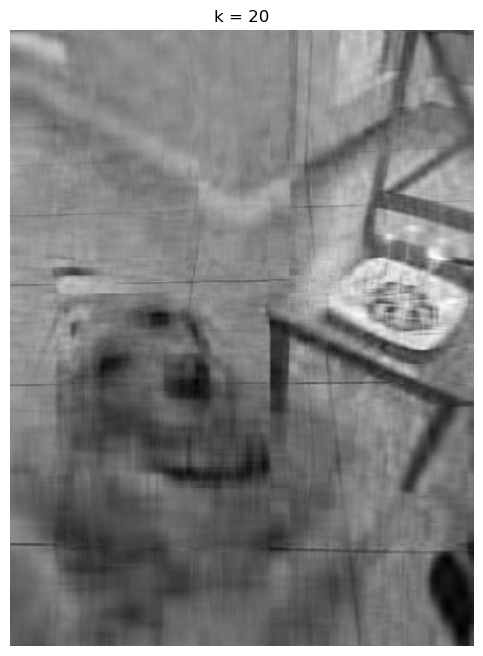

In [50]:
#20:
truncate_image(k=20,pathtoimage='./code_ipynb/')

Now we are getting warmer.  This looks like a dog?

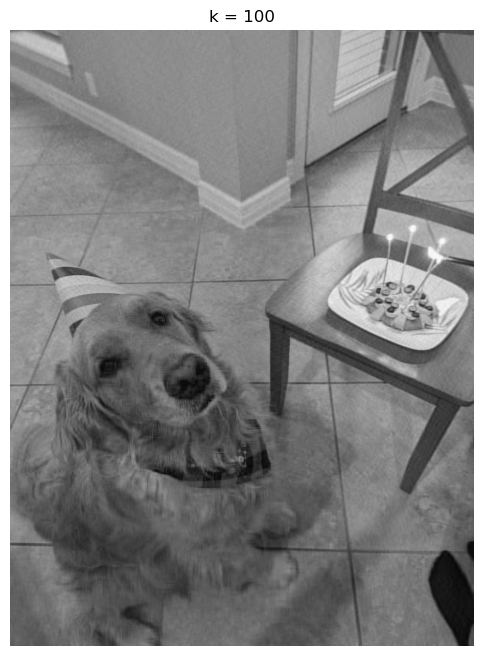

In [51]:
#100:
truncate_image(k=100,pathtoimage='./code_ipynb/')

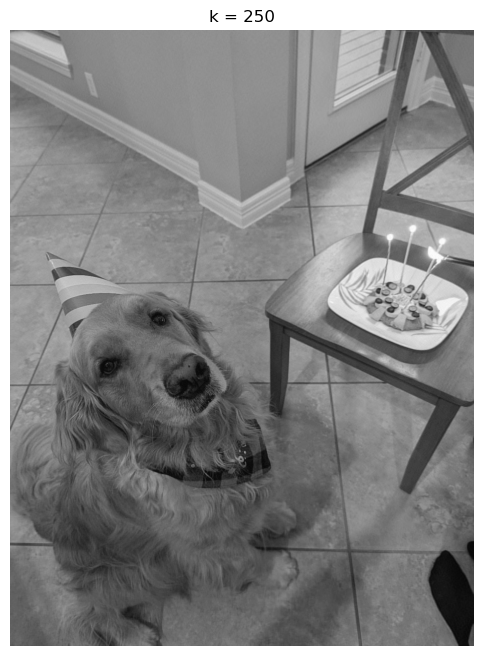

In [52]:
#250:
truncate_image(k=250,pathtoimage='./code_ipynb/')

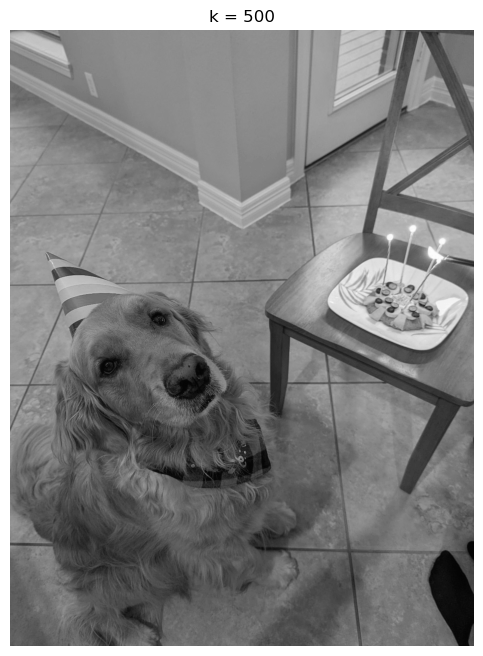

In [53]:
#500:
truncate_image(k=500,pathtoimage='./code_ipynb/')


We can see that truncating at the first singular value gets just the very rough levels of bright and dark right, and the image of my dog starts to show up slightly by k=5 and noticeably by k=20.  By k=100, the differences with the original image (in the same folder) are minor.